<br><br><center><h1 style="font-size:4em;color:#2467C0">Project: Investigate a Dataset</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://e00-marca.uecdn.es/assets/multimedia/imagenes/2019/01/08/15469494175619.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This project is connected with the Introduction to Data Analysis course and is part of the Data Analyst nanodegree program offered by Udacity. I will be using one of the available dataset options taken from the site <a href="https://www.kaggle.com">Kaggle</a>. This <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. 
<br>
<br>
The database is stored in a SQLite database. DB Browser was used to access the database files, check the DB Schema,understand the data and probe SQL Queries. 
<br>
<br>
The goal of this project is to better understand the data analysis process and get hands on experience using Python analytical and visualization libraries like NumPy,pandas,scipy,Matplotlib and Seaborn as well as SQL. The connection between Python and SQL for quering and fectching data from a Database is also an import learning experience from this project.The simple analytical process will include some steps for exploring  and cleaning the dataset and some steps for exploratory data analysis. The use of advanced inferential statistics methods and machine learning are not part ofthe analysis, so the findings are tentative and do not go beyond an exploratory data analysis process. 
<br>
<br>
This project, both the code and the notebook report was made by: Gustavo Cedeno
</td>
</tr>
</table>

# Project: Investigate a Dataset (Soccer Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is connected with the Introduction to Data Analysis course and is part of the Data Analyst nanodegree program offered by Udacity. I will be using one of the available dataset options taken from the site <a href="https://www.kaggle.com">Kaggle</a>. This <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a> has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.
>The database is stored in a SQLite database. DB Browser was used to access database files, check the DB Schema,understand the data and checking SQL Queries.
> The goal of this project is to better understand the data analysis process and get hands on experience using Python analytical and visualization libraries like `NumPy`, `pandas`, `scipy`, `Matplotlib` and `Seaborn` as well as `SQL`. The connection between Python and SQL for quering and fetching data from a Database is also an import learning experience from this project.The simple analytical process will include some steps for exploring  and cleaning the dataset and some steps for exploratory data analysis. The use of advanced inferential statistics methods and machine learning are not part of the analysis, so the findings are tentative and do not go beyond an exploratory data analysis process.

>Answering two research questions is the main purpose of the exploratory data analysis, namely: 
> * Research Question 1: What team attributes lead to the most victories?
> * Research Question 2: What team attributes contribute to scoring more goals?

> The notebook template used for this report was provided by **Udacity**. 

### Data Source
<br> 
<ol>
<li>Data taken from: <a href="https://www.kaggle.com/hugomathien/soccer">https://www.kaggle.com/hugomathien/soccer</a></li>
</ol>

### Python Libraries 
<br> For the analysis, the following python libraries are used:
<ul>
<li><b>sqlite3</b> for interacting with a local relational database.</li>
<li><b>pandas</b> and <b>numpy</b> for data ingestion and manipulation.</li>
<li><b>matplotlib</b> and <b>seaborn</b> for data visualization.</li>
<li>specific statistical methods from <b>scipy</b> and
<li><b>jupyter notebook</b>, for code development and analysis description.</li>

</ul>

In [1]:
# Importing the required packages for the analysis
#visualization will be plotted inline with the notebook and seaborn style is arbitrary set to "darkgrid"
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Before proceeding with the analysis, I start extracting the data from the database using a SQL query, continue with some data exploration, check for cleanliness, and then trim and clean the dataset in order to make it ready for the analysis. As part of this report, the steps taken are documented to provide guidance to the reader(and also for myself!).

### General Properties

>For my analysis, I need to have the data of the total victories and goals scored by each team, for that purpose I use a SQL query to calculate the number of victories and goals of each team from the `Match` table and save it into a pandas DataFrame.
>Additionally, I take the team name and attributes from the `Team` and `Team_Attributes` tables respectively. The attribute `team_api_id` is used for establishing relationships between tables. 

In [2]:
#Calculating data about victories and scored goals for each team, playing at home and as visitor 
query_team_stats= ''' SELECT Home.team_api_id,(Home.home_victories + Away.away_victories) as total_victories,
Home.home_victories, Away.away_victories,
(Home.total_home_goals + Away.total_away_goals) as total_goals, Home.total_home_goals, Away.total_away_goals   
FROM 
(SELECT home_team_api_id as team_api_id,COUNT(home_team_api_id) as home_victories,
SUM(home_team_goal) as total_home_goals FROM Match
WHERE home_team_goal > away_team_goal GROUP BY home_team_api_id) AS Home 
JOIN 
(SELECT away_team_api_id as team_api_id,COUNT(away_team_api_id) as away_victories, SUM(away_team_goal) 
as total_away_goals 
FROM Match 
WHERE home_team_goal < away_team_goal GROUP BY away_team_api_id) AS Away 
ON Home.team_api_id = Away.team_api_id 
GROUP BY Home.team_api_id'''
#Getting basic Team's data, just to get the name of each team 
query_team = "SELECT * FROM Team"
#Getting Team Features or Attributes
query_team_att = "SELECT * FROM Team_Attributes" 

In [3]:
#Creating a connection to the database and extracting data 
cnx = sqlite3.connect('soccer_database.sqlite')
# Converting the extracted data into pandas DataFrame
df_stats = pd.read_sql_query(query_team_stats, cnx) #df with victories and goals 
df_team = pd.read_sql_query(query_team, cnx)  #df containing team names
df_team_Att = pd.read_sql_query(query_team_att, cnx) #df containing Team Attributes

> I will start the exploration by generating some simple statistics and checking that the queries work as intended 

In [4]:
#Checking general information 
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 7 columns):
team_api_id         298 non-null int64
total_victories     298 non-null int64
home_victories      298 non-null int64
away_victories      298 non-null int64
total_goals         298 non-null int64
total_home_goals    298 non-null int64
total_away_goals    298 non-null int64
dtypes: int64(7)
memory usage: 16.4 KB


In [5]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [6]:
df_team.nunique() #Seems like there are more teams than colected data (one without data)

id                  299
team_api_id         299
team_fifa_api_id    285
team_long_name      296
team_short_name     259
dtype: int64

In [7]:
df_team_Att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

>Checking the attributes DataFrame, one can notice that attributes are recorded per game and not as team specific attributes. For the analysis, I need to create a new DataFrame with Atributes for each team!  

In [8]:
df_team_Att.nunique() #Attributes are for recorded game and not general attibutes for each team
#/need to get attibutes for each team 

id                                1458
team_fifa_api_id                   285
team_api_id                        288
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass               3
defenceTeamWidth                    43
defenceTeamWidthClass                3
defenceDefenderLineClass             2
dtype: int64

In [9]:
df_team_Att.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


>Since the analysis is related to team attributes, I need to get a better idea of the characteristics of each feature like 
>data type, classification and meaning

In [10]:
#Exploring some classifications 
df_team_Att.loc[:,'buildUpPlaySpeedClass':'defenceDefenderLineClass'].head()

,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


>Some attributes seem to be kind of standard for all teams, so it doesn't make sense to consider those attributes when tryig to distinguish some teams based on their attributes

In [11]:
#Exploring some classifications
df_team_Att.groupby(['buildUpPlayPositioningClass']).count()['team_api_id'] 

buildUpPlayPositioningClass
Free Form      72
Organised    1386
Name: team_api_id, dtype: int64

In [12]:
df_team_Att.groupby(['chanceCreationPositioningClass']).count()['team_api_id'] 

chanceCreationPositioningClass
Free Form     149
Organised    1309
Name: team_api_id, dtype: int64

In [13]:
df_team_Att.groupby(['defenceDefenderLineClass']).count()['team_api_id'] 

defenceDefenderLineClass
Cover           1362
Offside Trap      96
Name: team_api_id, dtype: int64

>By exploring the data one can notice that most teams played their matches in an organised form and with a Cover defense, which is expected for most professional teams, so these attributes are general for most teams and not relevant for the analysis.

### Data Cleaning (Handling Missing Data)
> I need to make sure the data is clean, get rid of null or missing values before attending to do additional operations and data analysis. 

In [14]:
#Are there NULL values?
df_stats.isnull().any().any(), df_stats.shape #Perfect no more work needed 

(False, (298, 7))

In [15]:
df_team.isnull().any().any(), df_team.shape #Data cleaning needed

(True, (299, 5))

In [16]:
#Checking how many null values are in this df
#Rows with missing data
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [17]:
df_team_Att.isnull().any().any(), df_team_Att.shape

(True, (1458, 25))

In [18]:
df_team_Att.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

##  Droping extraneous columns
Need to drop features that aren't consistent,have to many missing values or aren't relevant for the analysis. With the use of [pandas' drop function.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

**Columns to Drop:**
* From **df_team** dataset: `'id', 'team_fifa_api_id'`
* From **df_team_Att** dataset: `'id', 'team_fifa_api_id', 'date', 'buildUpPlayDribbling','buildUpPlayPositioningClass',       'chanceCreationPositioningClass','defenceDefenderLineClass'`

In [19]:
# drop columns from df_team dataset
df_team.drop(['id', 'team_fifa_api_id'], axis=1, inplace=True)
# confirm changes
df_team.head()

,team_api_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB


In [20]:
# drop columns from df_team_Att dataset
df_team_Att.drop(['id', 'team_fifa_api_id','date','buildUpPlayDribbling','buildUpPlayPositioningClass',
                  'chanceCreationPositioningClass','defenceDefenderLineClass'], axis=1, inplace=True)
# confirm changes
df_team_Att.head()

,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass
0,9930,60,Balanced,Little,50,Mixed,60,Normal,65,Normal,55,Normal,50,Medium,55,Press,45,Normal
1,9930,52,Balanced,Normal,56,Mixed,54,Normal,63,Normal,64,Normal,47,Medium,44,Press,54,Normal
2,9930,47,Balanced,Normal,54,Mixed,54,Normal,63,Normal,64,Normal,47,Medium,44,Press,54,Normal
3,8485,70,Fast,Little,70,Long,70,Risky,70,Lots,70,Lots,60,Medium,70,Double,70,Wide
4,8485,47,Balanced,Little,52,Mixed,53,Normal,48,Normal,52,Normal,47,Medium,47,Press,52,Normal


In [21]:
#Confirming there are no missing values
df_team.isnull().any().any(), df_team.shape

(False, (299, 3))

In [22]:
#Confirming there are no missing values
df_team_Att.isnull().any().any(), df_team_Att.shape

(False, (1458, 18))

> Perfect, now the data is clean and ready for further operations and analysis! 

<a id='eda'></a>
## Exploratory Data Analysis

> Now after the data have been trimmed and cleaned, is ready for moving on to exploration. As part of this section, I'll compute some statistics and create visualizations with the goal of addressing the research questions posed in the Introduction section. I'll start by  looking at the attributes one at a time and then follow the analysis by looking at relationships between attributes and victories.

### Research Question 1 (What team attributes lead to the most victories?)
>I will try to find out what the attributes of the best european soccer teams are. It is important to mention that by "best_teams" I mean those teams with the greater number of victories, assuming every european soccer league has the same level (which in reality is not the case, since the LIGA BBVA in Spain, erste Bundesliga in Germany, Serie A in Italy and the Premier League in England are the best european leagues)

>In order to get attibutes for each team instead of match, I use `groupby` and take the mean value of the attributes.  

In [23]:
#Group by mean attributes for each team  
df_tAtt = df_team_Att.groupby(['team_api_id']).mean()
df_tAtt.shape

(288, 8)

>Looks like not all teams have registered attributes, so teams without registered attributes will be discarded 

In [24]:
df_tAtt.head()

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,
1601,47.333333,46.166667,55.500000,60.333333,53.5,47.166667,47.333333,49.333333
1773,52.000000,50.000000,50.000000,53.000000,54.0,43.000000,44.000000,50.000000
1957,47.166667,52.666667,50.833333,36.333333,67.0,49.333333,56.333333,53.666667
2033,49.000000,48.400000,51.800000,44.200000,48.2,42.200000,33.800000,45.400000
2182,60.333333,49.000000,56.666667,57.333333,68.0,51.666667,48.500000,54.500000


## Merging Datasets
>I want to create a DataFrame containing team's information, match statistics(victories and goals) for each team as well as attributes. For that purpose, I make use of Panda's Merges to create a combined df from `df_stats`,`df_Team` and `df_tAtt`. I only have interest in those teams with registered attributes, therefore I use an inner Join/Merge. 

In [25]:
# merge datasets
df_combined_team = pd.merge(df_team,df_stats,left_on='team_api_id',right_on='team_api_id', how='inner')
#checking that the merge worked out as intended
df_combined_team.head()

,team_api_id,team_long_name,team_short_name,total_victories,home_victories,away_victories,total_goals,total_home_goals,total_away_goals
0,9987,KRC Genk,GEN,97,61,36,260,172,88
1,9993,Beerschot AC,BAC,40,30,10,95,75,20
2,10000,SV Zulte-Waregem,ZUL,78,45,33,188,114,74
3,9994,Sporting Lokeren,LOK,74,41,33,175,97,78
4,9984,KSV Cercle Brugge,CEB,58,38,20,123,81,42


In [26]:
#Exploring the new DataFrame
df_combined_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 9 columns):
team_api_id         298 non-null int64
team_long_name      298 non-null object
team_short_name     298 non-null object
total_victories     298 non-null int64
home_victories      298 non-null int64
away_victories      298 non-null int64
total_goals         298 non-null int64
total_home_goals    298 non-null int64
total_away_goals    298 non-null int64
dtypes: int64(7), object(2)
memory usage: 23.3+ KB


> **Adding team match statistics to get a final DataFrame ready for analysis**

In [27]:
df_combined = pd.merge(df_combined_team,df_tAtt,left_on='team_api_id',right_on='team_api_id', how='inner')
# view to check final merge
df_combined.head()

,team_api_id,team_long_name,team_short_name,total_victories,home_victories,away_victories,total_goals,total_home_goals,total_away_goals,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9987,KRC Genk,GEN,97,61,36,260,172,88,56.333333,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333
1,9993,Beerschot AC,BAC,40,30,10,95,75,20,46.000000,41.500000,46.000000,53.500000,53.750000,48.250000,49.000000,58.750000
2,10000,SV Zulte-Waregem,ZUL,78,45,33,188,114,74,55.500000,52.666667,50.000000,49.333333,41.500000,48.666667,56.166667,47.833333
3,9994,Sporting Lokeren,LOK,74,41,33,175,97,78,64.000000,53.500000,44.000000,47.666667,54.333333,48.833333,55.166667,55.500000
4,9984,KSV Cercle Brugge,CEB,58,38,20,123,81,42,53.666667,44.166667,59.000000,60.333333,48.000000,60.166667,49.666667,64.666667


In [28]:
#Exploring the newly created dataset
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 286
Data columns (total 17 columns):
team_api_id               287 non-null int64
team_long_name            287 non-null object
team_short_name           287 non-null object
total_victories           287 non-null int64
home_victories            287 non-null int64
away_victories            287 non-null int64
total_goals               287 non-null int64
total_home_goals          287 non-null int64
total_away_goals          287 non-null int64
buildUpPlaySpeed          287 non-null float64
buildUpPlayPassing        287 non-null float64
chanceCreationPassing     287 non-null float64
chanceCreationCrossing    287 non-null float64
chanceCreationShooting    287 non-null float64
defencePressure           287 non-null float64
defenceAggression         287 non-null float64
defenceTeamWidth          287 non-null float64
dtypes: float64(8), int64(7), object(2)
memory usage: 40.4+ KB


#### Checking that data is clean! 
> All `team_api_id` values must be unique and there must be no missing values

In [29]:
#checking for unique values
df_combined['team_api_id'].nunique()

287

In [30]:
#Checking if there are null values (expected result =0 for all features)
df_combined.isnull().sum() 

team_api_id               0
team_long_name            0
team_short_name           0
total_victories           0
home_victories            0
away_victories            0
total_goals               0
total_home_goals          0
total_away_goals          0
buildUpPlaySpeed          0
buildUpPlayPassing        0
chanceCreationPassing     0
chanceCreationCrossing    0
chanceCreationShooting    0
defencePressure           0
defenceAggression         0
defenceTeamWidth          0
dtype: int64

In [31]:
#Saving the newly created dataset as csv file for later use and sharing
df_combined.to_csv('combined_dataset.csv', index=False)

### Exploring with visuals
> For the following sections, I will create some visualizations, classifications and basic statistics that will be usefull for deriving conclusions.  

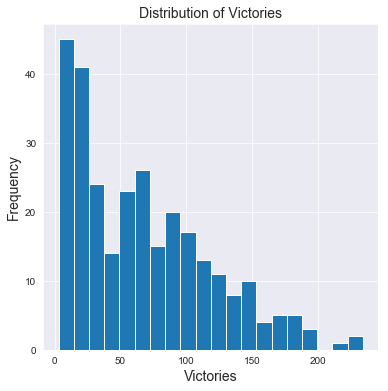

In [32]:
#Let's take a look of the victories distribution
df_combined['total_victories'].hist(bins=20, figsize=(6,6));
plt.title('Distribution of Victories',fontsize=14);
plt.xlabel('Victories',fontsize=14);
plt.ylabel('Frequency',fontsize=14);

> It seems that top winners are scarce, but this histogram doesn't say a lot to me, so let's explore the best teams in more detail

### Fiding the top winners 

For doing that, I create a categorical variable from a quantitative variable by creating performance categories using [pandas' cut function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html). Then, I create a new column called `performance_levels` with these categories:

**Performance Levels:**
* Outstanding: 75% - max `total_victories`
* High: 50% - 75% of `total_victories`
* Medium: 25% - 50% of `total_victories`
* Low: Lowest 25% of `total_victories`


_The data is being split at the 25th, 50th, and 75th percentile. I get these numbers with pandas' describe(). After creating these four categories, I'll visualize them the help of barplots_

In [33]:
#Finding percentiles
df_combined['total_victories'].describe()

count    287.000000
mean      67.247387
std       51.472630
min        3.000000
25%       22.000000
50%       59.000000
75%      100.000000
max      234.000000
Name: total_victories, dtype: float64

In [34]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [3,22,59,100,234] 

In [35]:
# Labels for the four performance level groups
bin_names = ['Low','Medium' ,'High' ,'Outstanding' ]

In [36]:
# Creates performance_levels column
df_combined['performance_levels'] = pd.cut(df_combined['total_victories'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_combined.head()

,team_api_id,team_long_name,team_short_name,total_victories,home_victories,away_victories,total_goals,total_home_goals,total_away_goals,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,performance_levels
0,9987,KRC Genk,GEN,97,61,36,260,172,88,56.333333,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,High
1,9993,Beerschot AC,BAC,40,30,10,95,75,20,46.000000,41.500000,46.000000,53.500000,53.750000,48.250000,49.000000,58.750000,Medium
2,10000,SV Zulte-Waregem,ZUL,78,45,33,188,114,74,55.500000,52.666667,50.000000,49.333333,41.500000,48.666667,56.166667,47.833333,High
3,9994,Sporting Lokeren,LOK,74,41,33,175,97,78,64.000000,53.500000,44.000000,47.666667,54.333333,48.833333,55.166667,55.500000,High
4,9984,KSV Cercle Brugge,CEB,58,38,20,123,81,42,53.666667,44.166667,59.000000,60.333333,48.000000,60.166667,49.666667,64.666667,Medium


### Create a bar chart for each of the four performance levels.

In [37]:
# Finding the mean victories of each performance level with groupby
mean_P_levels = df_combined.groupby('performance_levels')['total_victories'].mean()  
#Assigning numerical values for each performace level
mean_P_low = mean_P_levels[0]
mean_P_M = mean_P_levels[1]
mean_P_H = mean_P_levels[2]
mean_P_O = mean_P_levels[3]
#Checking the values
mean_P_levels

performance_levels
Low             12.472222
Medium          39.800000
High            78.239437
Outstanding    139.652778
Name: total_victories, dtype: float64

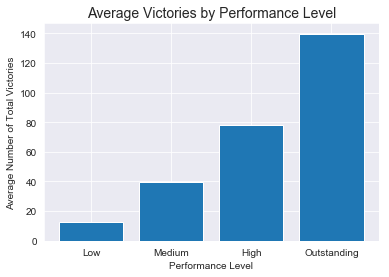

In [38]:
# Create a bar chart for each performance level
locations =[1,2,3,4];
heights = [mean_P_low, mean_P_M, mean_P_H, mean_P_O];
labels = ['Low','Medium','High','Outstanding'];
plt.bar(locations, heights, tick_label = labels);
plt.title('Average Victories by Performance Level',fontsize=14);
plt.xlabel('Performance Level');
plt.ylabel('Average Number of Total Victories');

> Based on the bar chart, one can clearly notice that on average, teams from a higher category almost double the number of victories as compared to those from the following lower category, apparently showing a huge difference in performance level.   

### Checking the Classifications
> If everything is right, every category should contain 25% of the data

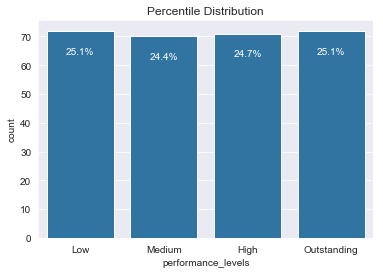

In [39]:
# creating the plot
base_color = sns.color_palette()[0]
sns.countplot(data =df_combined, x = 'performance_levels', color = base_color) 

# adding annotations
n_points = df_combined.shape[0]
cat_counts = df_combined['performance_levels'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')
plt.title('Percentile Distribution');

### Getting the Outstanding Performers (75th percentile)
> I create a DataFrame containing only information about those teams with the greater number of victories in  order to analyze top winner's attributes. 

In [40]:
#Analysing the attibutes of the outstanding performers 
df_OSdn_Perf=df_combined.query('performance_levels == "Outstanding"');
#Taking a look of attibute names
df_OSdn_Perf.columns 

Index(['team_api_id', 'team_long_name', 'team_short_name', 'total_victories',
       'home_victories', 'away_victories', 'total_goals', 'total_home_goals',
       'total_away_goals', 'buildUpPlaySpeed', 'buildUpPlayPassing',
       'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth', 'performance_levels'],
      dtype='object')

### Visualizing linear relationships
>With the goal of analysing the attributes that contribute the most to victories, a simple relationship between variables will be estimated and ploted to add a visual guide to find patterns in the exploratory data analysis. 

C:\Users\Gustavo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


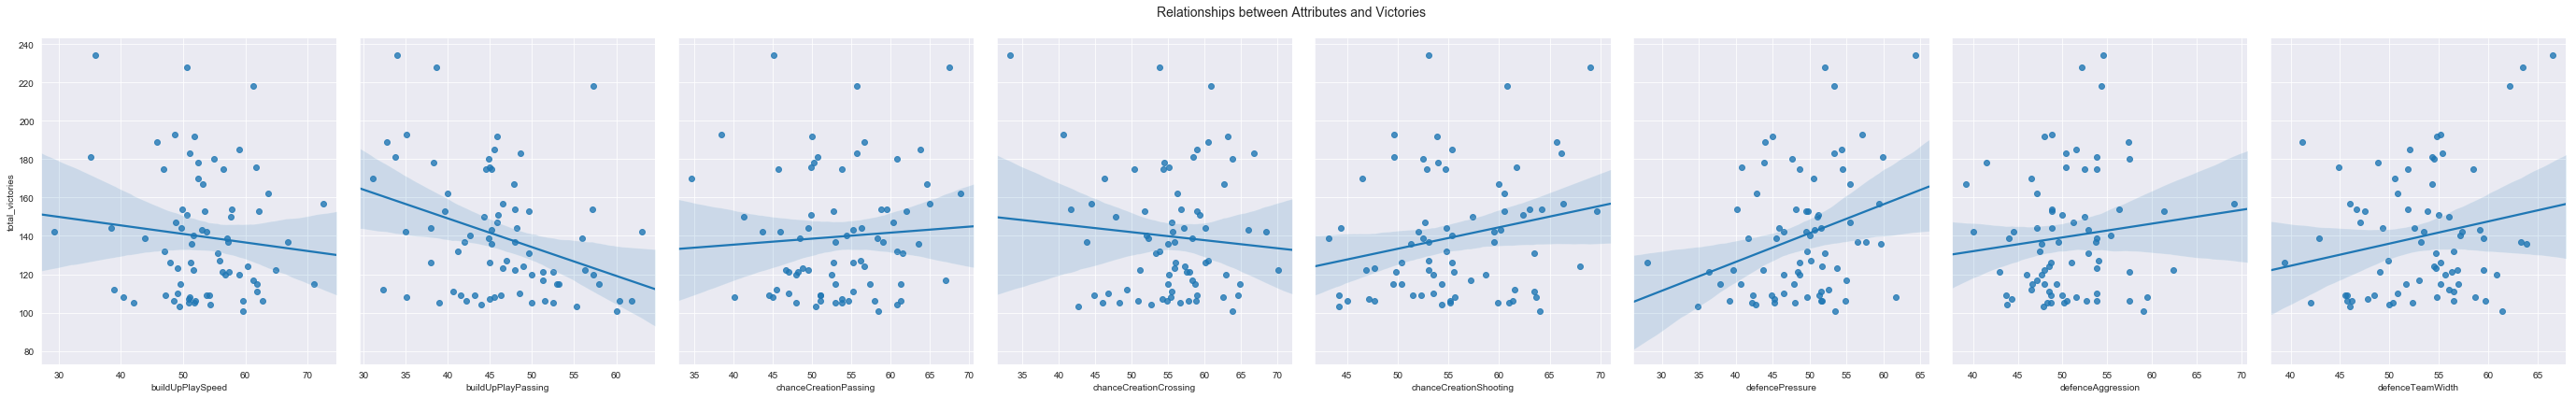

In [41]:
#Creating Plotting Variables
X=['buildUpPlaySpeed', 'buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing','chanceCreationShooting', 
   'defencePressure', 'defenceAggression','defenceTeamWidth'];
Y=['total_victories'];
DATA = df_OSdn_Perf;
#Visualization of relationships between attributes and victories for Outstanding Performers
sns.pairplot(DATA, x_vars=X, y_vars=Y, height=6, aspect=.8, kind="reg",);
plt.subplots_adjust(top=0.9);
plt.suptitle('Relationships between Attributes and Victories', fontsize = 14);

> **For better visualization, I will divide the plotting set into two groups**

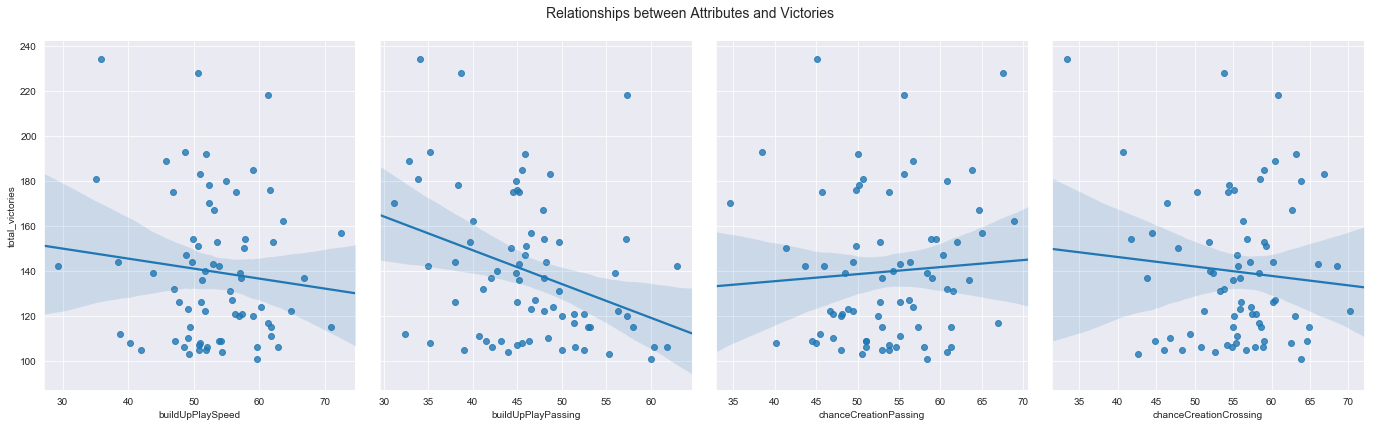

In [42]:
#Visualization of relationships between attributes and victories for Outstanding Performers
sns.pairplot(DATA, x_vars=X[:4], y_vars=Y, height=6, aspect=.8, kind="reg",);
plt.subplots_adjust(top=0.9);
plt.suptitle('Relationships between Attributes and Victories', fontsize = 14);

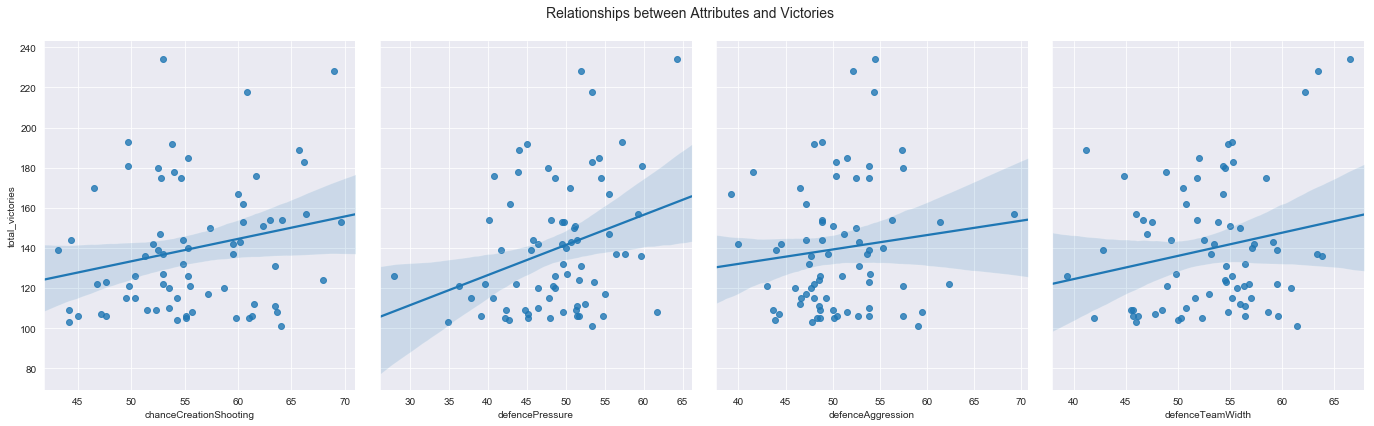

In [43]:
#Visualization of relationships between attributes and victories for Outstanding Performers
sns.pairplot(DATA, x_vars=X[4:], y_vars=Y, height=6, aspect=.8, kind="reg",);
plt.subplots_adjust(top=0.9);
plt.suptitle('Relationships between Attributes and Victories', fontsize = 14);

### Finding some interesting relationships
Based on the graphs and  linear relationships, it seems like the attributes leading to a greater number of victories are:
* `chanceCreationPassing`
* `chanceCreationShooting`
* `defencePressure`
* `defenceAggression`
* `defenceTeamWidth`

**Let's take a closer look at those attributes and their relation to victories**

**References**
> The following tools and statiscal methods are used to help the analysis. 
* [Seaborn_API](https://seaborn.pydata.org/api.html)
* [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
* [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
* [matplotlib.pyplot.text](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.text)
* [Text Properties](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)

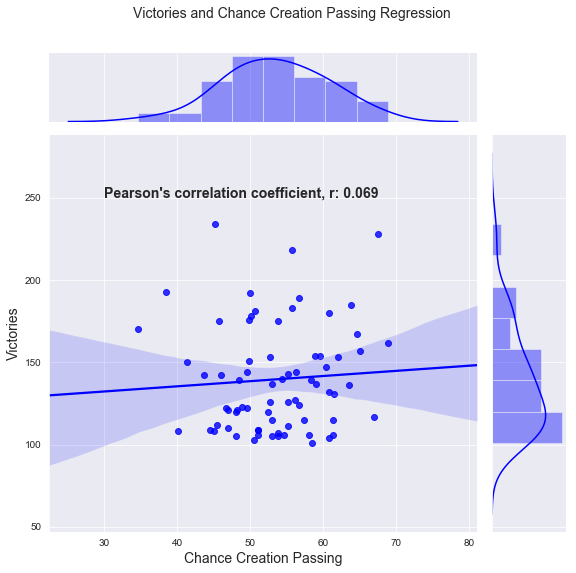

In [44]:
#Scatter plot to visualize relationships 
sns.jointplot(x="chanceCreationPassing", y=Y[0], data=DATA, height=8,kind="reg",color='b');
plt.xlabel('Chance Creation Passing',fontsize = 14);
plt.ylabel('Victories',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Victories and Chance Creation Passing Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x=DATA["chanceCreationPassing"].values
y=DATA['total_victories'].values
Pear = stats.pearsonr(x,y)
s="Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(30,250,s, fontsize=14,fontweight=700);

> It looks like `chance creation Passing` is not a strong determinant for victories. Passing the ball from one site to another doesn't imply getting a better chance of winning the game, in the end, the final score is all that matters!  

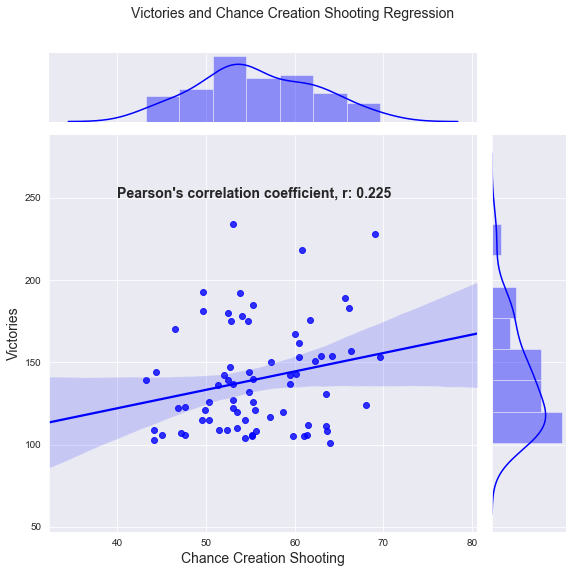

In [45]:
#Scatter plot to visualize relationships
sns.jointplot(x="chanceCreationShooting", y=Y[0], data=DATA, height=8,kind="reg",color='b');
plt.xlabel('Chance Creation Shooting',fontsize = 14);
plt.ylabel('Victories',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Victories and Chance Creation Shooting Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x = DATA["chanceCreationShooting"].values #np.arrays
y = DATA['total_victories'].values #np.arrays
Pear = stats.pearsonr(x,y)
s = "Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(40,250,s, fontsize=14,fontweight=700);

> `Chanche Creation Shooting` seems to have more influence on victories. Attempting to score a goal is always the main purpose of those teams willing to win the game, not surprinsingly there is a positive correlation between shooting to goal and the number of victories. 

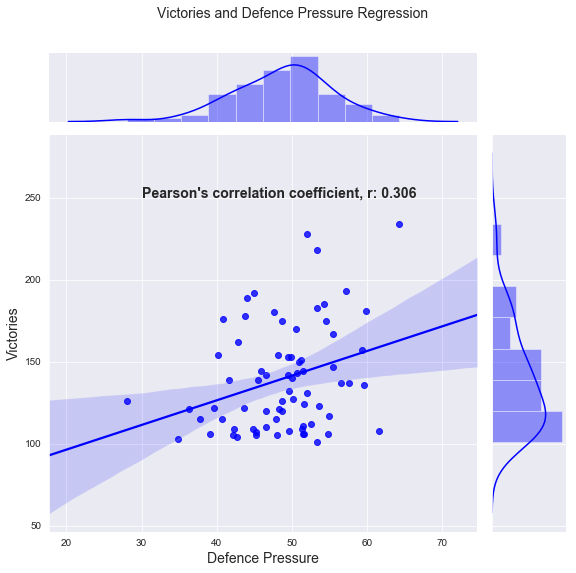

In [46]:
#Scatter plot to visualize relationships
sns.jointplot(x="defencePressure", y=Y[0], data=DATA, height=8,kind="reg",color='b');
plt.xlabel('Defence Pressure',fontsize = 14);
plt.ylabel('Victories',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Victories and Defence Pressure Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x = DATA["defencePressure"].values #np.arrays
y = DATA['total_victories'].values #np.arrays
Pear = stats.pearsonr(x,y)
s = "Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(30,250,s, fontsize=14,fontweight=700);

> This one was a litle unexpected, not because it is not important, but because it seems to be more important than shooting to goal. `Defence Pressure` has a stronger correlation to victories than shooting to goal or any other attribute. It looks like that the best strategy could be a strong defensive pressure. Maybe more important than playing a good game is not letting your opponents play theirs.  

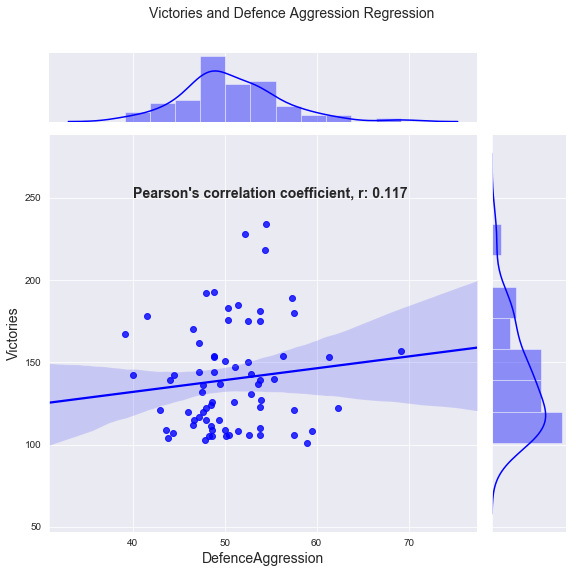

In [47]:
#Scatter plot to visualize relationships
sns.jointplot(x="defenceAggression", y=Y[0], data=DATA, height=8,kind="reg",color='b');
plt.xlabel('DefenceAggression',fontsize = 14);
plt.ylabel('Victories',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Victories and Defence Aggression Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x = DATA["defenceAggression"].values #np.arrays
y = DATA['total_victories'].values #np.arrays
Pear = stats.pearsonr(x,y)
s = "Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(40,250,s, fontsize=14,fontweight=700);

> Again, another defensive attribute that has a positive correlation to victories. 

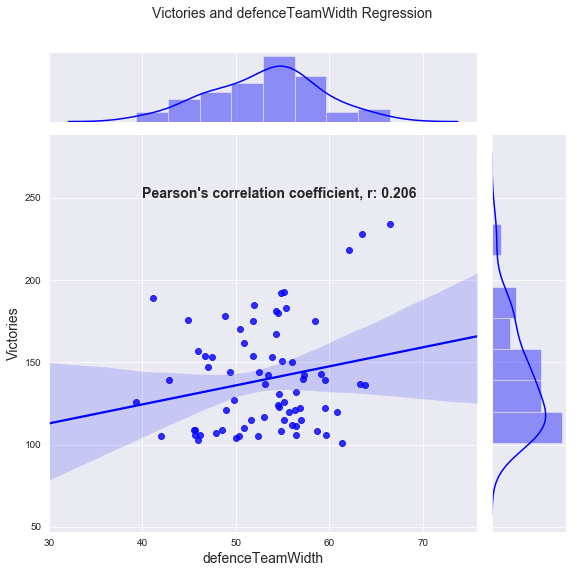

In [48]:
#Scatter plot to visualize relationships
sns.jointplot(x="defenceTeamWidth", y=Y[0], data=DATA, height=8,kind="reg",color='b');
plt.xlabel('defenceTeamWidth',fontsize = 14);
plt.ylabel('Victories',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Victories and defenceTeamWidth Regression',fontsize = 14);

#Calculating the Pearson correlation coefficient
x = DATA["defenceTeamWidth"].values #np.arrays
y = DATA['total_victories'].values #np.arrays
Pear = stats.pearsonr(x,y)
s = "Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(40,250,s, fontsize=14,fontweight=700);

> A good `defenceTeamWidth`, meaning spacing out side to side on the field and trying not to let the opponent free space for touching and moving the ball is another positively correlated attribute contributing to winning games. 

### Which are the top 10 European Winners?

In [49]:
#Only interested in the 75th Outstanding teams 
df_OSdn_Perf.describe()

,team_api_id,total_victories,home_victories,away_victories,total_goals,total_home_goals,total_away_goals,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9303.847222,139.652778,83.527778,56.125000,358.250000,221.291667,136.958333,53.063889,46.333333,53.528704,55.485648,55.687500,48.813426,50.634259,53.176852
std,1122.060198,32.121319,16.905681,16.404171,119.104611,70.765122,51.149446,7.856687,7.373715,7.091875,6.875073,6.451452,6.549013,5.212438,5.714760
min,2182.000000,101.000000,56.000000,32.000000,216.000000,133.000000,61.000000,29.333333,31.166667,34.666667,33.333333,43.166667,28.000000,39.166667,39.333333
25%,8627.500000,111.750000,70.750000,44.000000,272.750000,173.500000,104.500000,49.291667,41.875000,48.750000,52.250000,51.875000,44.958333,47.666667,49.250000
50%,9806.000000,134.000000,80.000000,53.000000,325.500000,200.500000,128.500000,52.333333,45.833333,53.416667,55.833333,54.833333,49.583333,50.000000,54.333333
75%,9944.750000,154.750000,93.500000,64.000000,403.500000,250.750000,154.000000,57.708333,50.333333,58.508333,59.083333,60.583333,52.708333,53.833333,56.500000
max,10267.000000,234.000000,131.000000,103.000000,779.000000,479.000000,306.000000,72.500000,63.000000,68.833333,70.166667,69.666667,64.333333,69.166667,66.500000


In [50]:
best_teams = df_OSdn_Perf.query('total_victories > 154')[['team_long_name','total_victories']]
#The 10 European Teams with more victories
best_teams.sort_values('total_victories',ascending=False).head(10)

,team_long_name,total_victories
247,FC Barcelona,234
245,Real Madrid CF,228
231,Celtic,218
92,FC Bayern Munich,193
23,Manchester United,192
130,Juventus,189
209,SL Benfica,185
200,FC Porto,183
158,Ajax,181
276,FC Basel,180


### Research Question 2  (What team attributes contribute to scoring more goals ?)

### Finding the top scorers 
Similar to finding the top winners, I create a categorical variable from a quantitative variable by creating performance categories using [pandas' cut function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html). Then, I create a new column called `scorer_levels` with these categories:

**Performance Levels:**
* Outstanding: 75% - max `total_goals`
* High: 50% - 75% of `total_goals`
* Medium: 25% - 50% of `total_goals`
* Low: Lowest 25% of `total_goals`


_Data is being split at the 25th, 50th, and 75th percentile. I get these numbers with pandas' describe(). After creating these four categories._ 

In [51]:
#Finding percentiles
df_combined['total_goals'].describe()

count    287.000000
mean     160.756098
std      141.453085
min        4.000000
25%       46.500000
50%      125.000000
75%      238.500000
max      779.000000
Name: total_goals, dtype: float64

In [52]:
df_combined['total_goals'].isnull().any()

False

In [53]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [4,46,125,238,779] 

In [54]:
# Labels for the four performance level groups based on scored goals
bin_names = ['Low','Medium' ,'High' ,'Outstanding' ]

In [55]:
# Creates performance_levels column
df_combined['scorer_levels'] = pd.cut(df_combined['total_goals'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_combined.head()

,team_api_id,team_long_name,team_short_name,total_victories,home_victories,away_victories,total_goals,total_home_goals,total_away_goals,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,performance_levels,scorer_levels
0,9987,KRC Genk,GEN,97,61,36,260,172,88,56.333333,44.333333,55.666667,52.333333,55.833333,49.166667,50.666667,59.833333,High,Outstanding
1,9993,Beerschot AC,BAC,40,30,10,95,75,20,46.000000,41.500000,46.000000,53.500000,53.750000,48.250000,49.000000,58.750000,Medium,Medium
2,10000,SV Zulte-Waregem,ZUL,78,45,33,188,114,74,55.500000,52.666667,50.000000,49.333333,41.500000,48.666667,56.166667,47.833333,High,High
3,9994,Sporting Lokeren,LOK,74,41,33,175,97,78,64.000000,53.500000,44.000000,47.666667,54.333333,48.833333,55.166667,55.500000,High,High
4,9984,KSV Cercle Brugge,CEB,58,38,20,123,81,42,53.666667,44.166667,59.000000,60.333333,48.000000,60.166667,49.666667,64.666667,Medium,Medium


### Getting the Outstanding Scorers (75th percentile)
> I create a DataFrame containing only information about those teams with the greater number of scored goals in  order to analyze top scorer's attributes. 

In [56]:
#Analysing the attibutes of the top scorers
df_TopScorer=df_combined.query('scorer_levels == "Outstanding"');
#Taking a look of attibute names
df_TopScorer.columns 

Index(['team_api_id', 'team_long_name', 'team_short_name', 'total_victories',
       'home_victories', 'away_victories', 'total_goals', 'total_home_goals',
       'total_away_goals', 'buildUpPlaySpeed', 'buildUpPlayPassing',
       'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth', 'performance_levels', 'scorer_levels'],
      dtype='object')

### Visualizing linear relationships
>With the goal of analysing the attributes that contribute the greater number of scored goals, a simple relationship between variables will be estimated and ploted to add a visual guide to find patterns in the exploratory data analysis. 

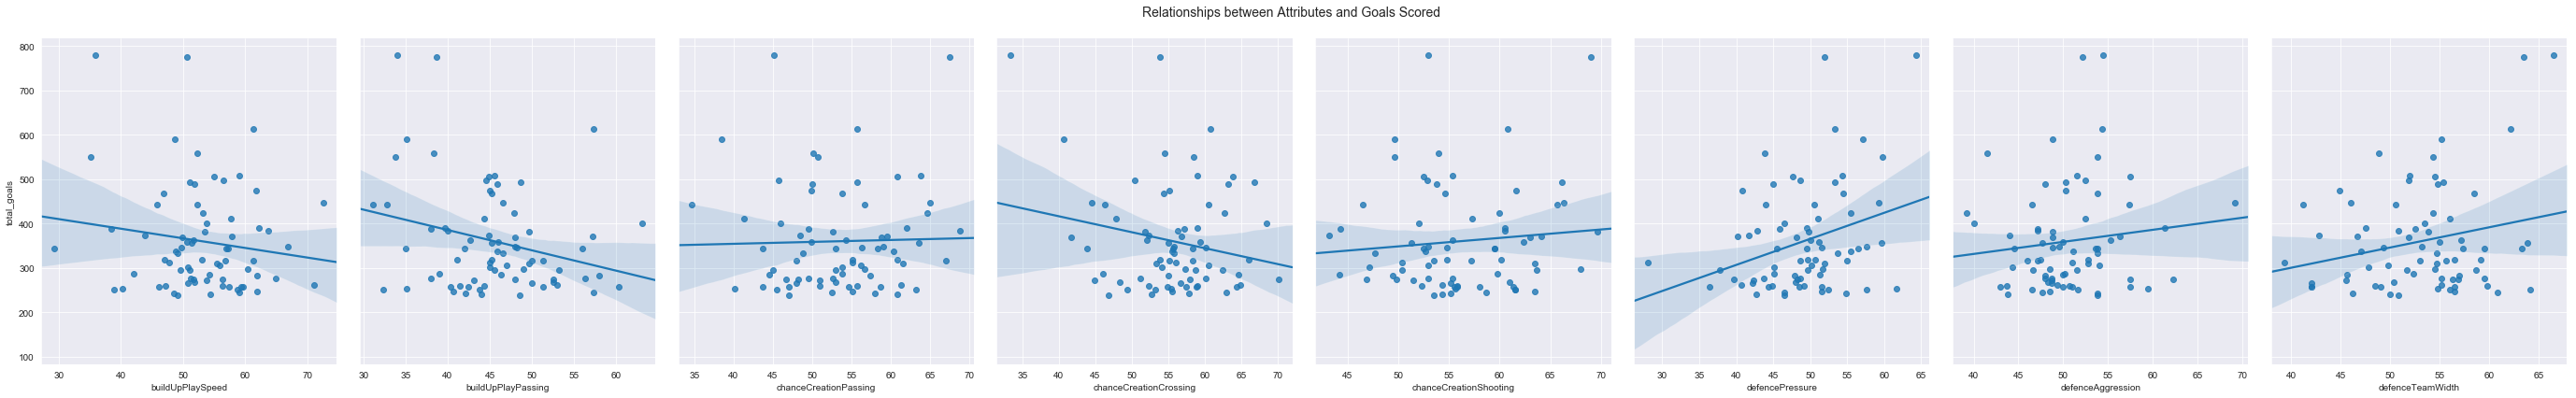

In [57]:
#Creating Plotting Variables
X=['buildUpPlaySpeed', 'buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing','chanceCreationShooting', 
   'defencePressure', 'defenceAggression','defenceTeamWidth'];
Y=['total_goals'];
DATA_goals = df_TopScorer;
#Visualization of relationships between attributes and goals for top scorers
sns.pairplot(DATA_goals, x_vars=X, y_vars=Y, height=6, aspect=.8, kind="reg",);
plt.subplots_adjust(top=0.9);
plt.suptitle('Relationships between Attributes and Goals Scored', fontsize = 14);

> **Splitting the plots in two groups for better visualization**

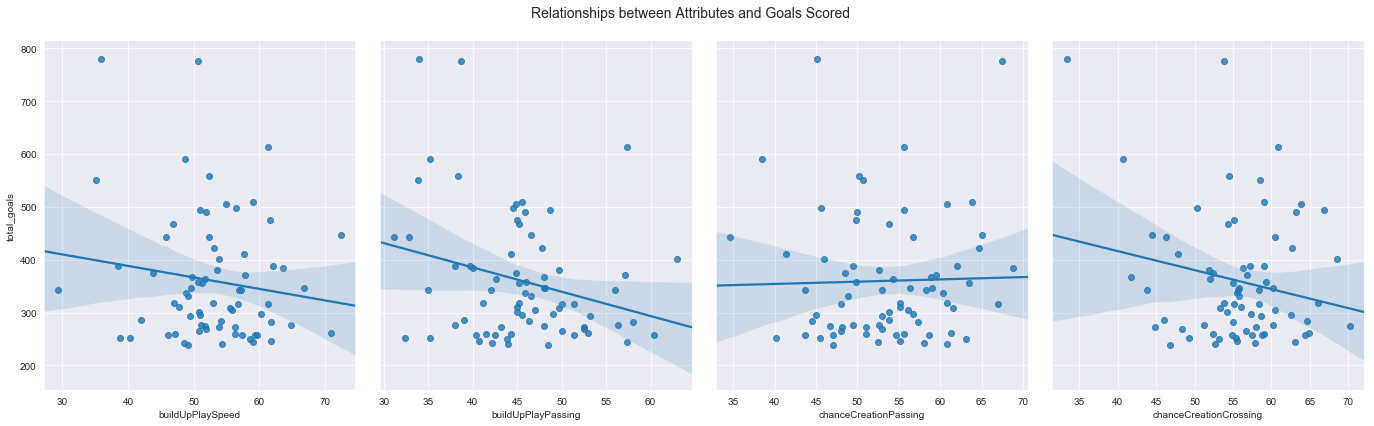

In [58]:
#Visualization of relationships between attributes and victories for top scorers
sns.pairplot(DATA_goals, x_vars=X[:4], y_vars=Y, height=6, aspect=.8, kind="reg",);
plt.subplots_adjust(top=0.9);
plt.suptitle('Relationships between Attributes and Goals Scored', fontsize = 14);

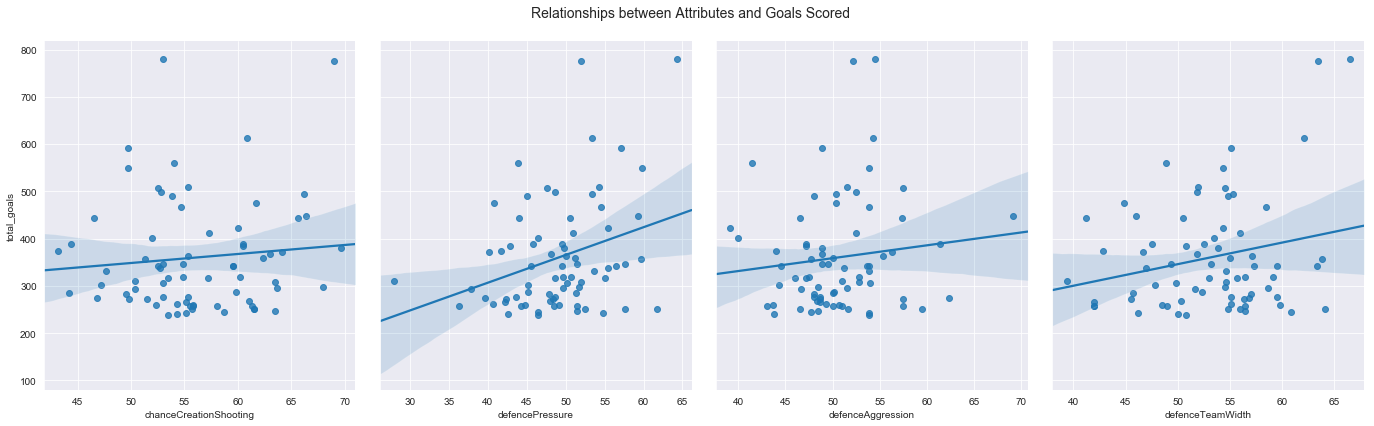

In [59]:
#Visualization of relationships between attributes and victories for top scorers
sns.pairplot(DATA_goals, x_vars=X[4:], y_vars=Y, height=6, aspect=.8, kind="reg",);
plt.subplots_adjust(top=0.9);
plt.suptitle('Relationships between Attributes and Goals Scored', fontsize = 14);

### Finding some interesting relationships

Based on the graphs and  linear relationships, it seems like the attributes leading to a greater number of scored goals are:
* `chanceCreationPassing`
* `chanceCreationShooting`
* `defencePressure`
* `defenceAggression`
* `defenceTeamWidth`

**Let's take a closer look at those attributes and their relation to number of goals scored**

**References**
> The following tools and statiscal methods are used to help the analysis. 
* [Seaborn_API](https://seaborn.pydata.org/api.html)
* [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
* [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
* [matplotlib.pyplot.text](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.text)
* [Text Properties](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)

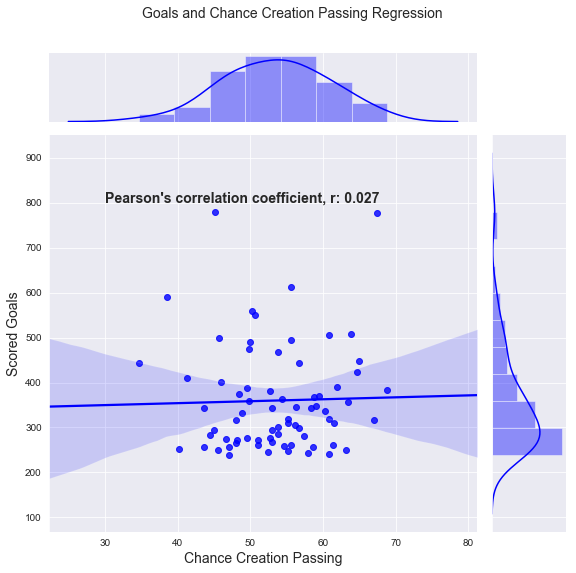

In [60]:
#Scatter plot to visualize relationships 
sns.jointplot(x="chanceCreationPassing", y=Y[0], data=DATA_goals, height=8,kind="reg",color='b');
plt.xlabel('Chance Creation Passing',fontsize = 14);
plt.ylabel('Scored Goals',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Goals and Chance Creation Passing Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x=DATA_goals["chanceCreationPassing"].values
y=DATA_goals['total_goals'].values
Pear = stats.pearsonr(x,y)
s="Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(30,800,s, fontsize=14,fontweight=700);

> It looks like just passing the ball from one site to another, even though can make the game aesthetically more pleasent to the eye, it is not a great factor for scoring more goals!  

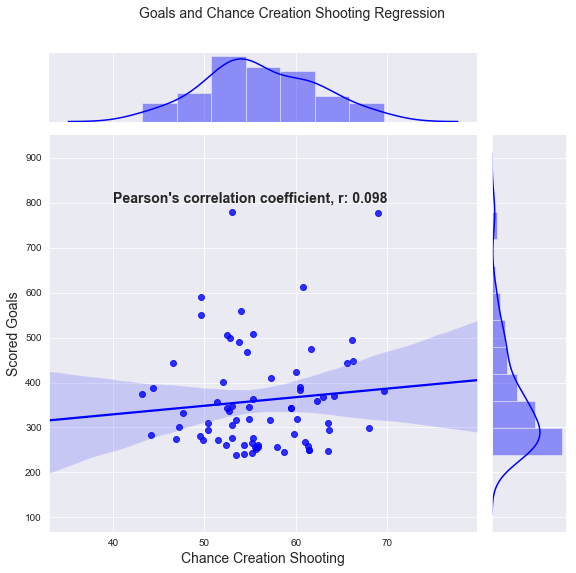

In [61]:
#Scatter plot to visualize relationships 
sns.jointplot(x="chanceCreationShooting", y=Y[0], data=DATA_goals, height=8,kind="reg",color='b');
plt.xlabel('Chance Creation Shooting',fontsize = 14);
plt.ylabel('Scored Goals',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Goals and Chance Creation Shooting Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x=DATA_goals["chanceCreationShooting"].values
y=DATA_goals['total_goals'].values
Pear = stats.pearsonr(x,y)
s="Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(40,800,s, fontsize=14,fontweight=700);

> This one was a real surprise! It is counterintuitive that having more chances shooting to goal doesn't have a very strong positive correlation to scoring more goals, but if we think about it, not every shoot go direct to goal, most of them are deflected and even if they have the right direction, there is also the goalkeeper playing its role saving the game!   

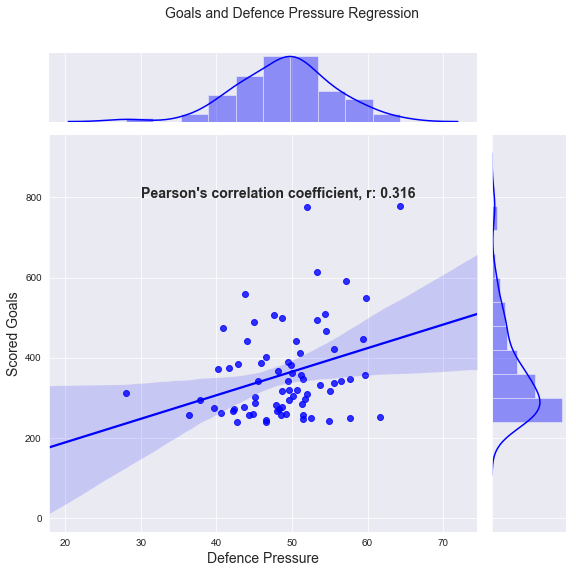

In [62]:
#Scatter plot to visualize relationships 
sns.jointplot(x="defencePressure", y=Y[0], data=DATA_goals, height=8,kind="reg",color='b');
plt.xlabel('Defence Pressure',fontsize = 14);
plt.ylabel('Scored Goals',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Goals and Defence Pressure Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x=DATA_goals["defencePressure"].values
y=DATA_goals['total_goals'].values
Pear = stats.pearsonr(x,y)
s="Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(30,800,s, fontsize=14,fontweight=700);

> Once again, the `Defence Pressure` has a very important role in scoring more goals. It totally makes sense, do not let the opponent play, get back the ball as soon as possible, attack and score. 

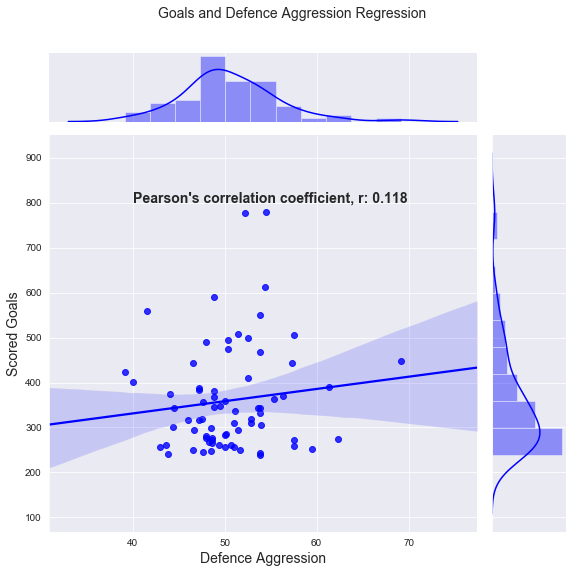

In [63]:
#Scatter plot to visualize relationships 
sns.jointplot(x="defenceAggression", y=Y[0], data=DATA_goals, height=8,kind="reg",color='b');
plt.xlabel('Defence Aggression',fontsize = 14);
plt.ylabel('Scored Goals',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Goals and Defence Aggression Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x=DATA_goals["defenceAggression"].values
y=DATA_goals['total_goals'].values
Pear = stats.pearsonr(x,y)
s="Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(40,800,s, fontsize=14,fontweight=700);

> Another defensive attribute that has a better correlation to scoring goals than ` chanceCreationShooting`. In the end, creating a lot of shooting opportunities is less important than having a strong defense, get the ball back fast and be effective at scoring. Don't create a lot of changes but score the ones you have!   

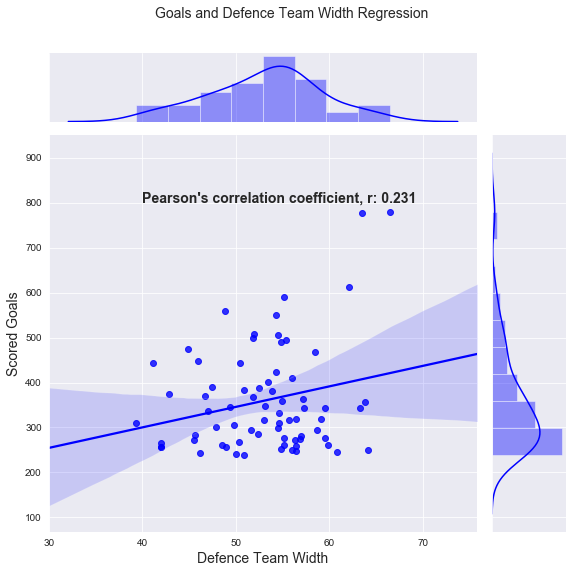

In [64]:
#Scatter plot to visualize relationships 
sns.jointplot(x="defenceTeamWidth", y=Y[0], data=DATA_goals, height=8,kind="reg",color='b');
plt.xlabel('Defence Team Width',fontsize = 14);
plt.ylabel('Scored Goals',fontsize = 14);
plt.subplots_adjust(top=0.9);
plt.suptitle('Goals and Defence Team Width Regression', fontsize = 14);

#Calculating the Pearson correlation coefficient
x=DATA_goals["defenceTeamWidth"].values
y=DATA_goals['total_goals'].values
Pear = stats.pearsonr(x,y)
s="Pearson's correlation coefficient, r: {:0.3f}".format(Pear[0])

#Showing the coefficient in the graph 
plt.text(40,800,s, fontsize=14,fontweight=700);

> After creating all those scatter plots and analyzing the correlations, one can tentatively suggest that the best strategy for winning more games and scoring more goals starts with an excellent defense. 

### Which are the top 10 European Scorers?

In [65]:
#Only interested in the 75th Outstanding teams 
df_TopScorer.describe()

,team_api_id,total_victories,home_victories,away_victories,total_goals,total_home_goals,total_away_goals,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9288.277778,139.125000,83.013889,56.111111,359.972222,221.902778,138.069444,53.018519,45.532407,53.527778,55.659722,56.108796,49.099537,50.541667,53.111111
std,1122.874935,32.792105,17.490032,16.419291,117.338318,70.115631,49.929056,7.834784,6.859171,7.210940,6.705313,6.052726,6.302536,5.101838,5.952538
min,2182.000000,89.000000,56.000000,33.000000,239.000000,133.000000,76.000000,29.333333,31.166667,34.666667,33.333333,43.166667,28.000000,39.166667,39.333333
25%,8627.500000,111.750000,69.750000,44.000000,272.750000,172.000000,104.500000,49.166667,41.416667,48.416667,52.583333,52.500000,45.125000,47.666667,49.250000
50%,9788.500000,134.000000,80.000000,53.000000,325.500000,200.500000,128.500000,52.666667,45.166667,53.833333,55.833333,55.250000,49.500000,50.000000,54.333333
75%,9963.250000,154.750000,93.500000,64.000000,403.500000,250.750000,154.000000,57.708333,49.166667,58.708333,59.083333,60.583333,52.708333,53.833333,56.500000
max,10269.000000,234.000000,131.000000,103.000000,779.000000,479.000000,306.000000,72.500000,63.000000,68.833333,70.166667,69.666667,64.333333,69.166667,66.500000


In [66]:
top_scorers = df_TopScorer.query('total_goals > 403')[['team_long_name','total_goals']]
#The 10 European Teams with the greater number of goals scored
top_scorers.sort_values('total_goals',ascending=False).head(10)

,team_long_name,total_goals
247,FC Barcelona,779
245,Real Madrid CF,776
231,Celtic,613
92,FC Bayern Munich,591
162,PSV,559
158,Ajax,550
209,SL Benfica,509
276,FC Basel,506
32,Manchester City,498
200,FC Porto,494


<a id='conclusions'></a>
## Conclusions

> Based on the exploratory analysis, using mainly visualizations, descriptive statistics and linear regression, which make the findings tentative and not conclusive, one can notice that some attributes seem to have a greater impact in both number of victories as well as in goals scored. It is interesting, that the apparent most important contributor for a team's outstanding performance regarding both victories and scored goals is a good defence, being the `defence pressure`, the attribute with the highest Pearson's correlation coefficient r. Based solely on the visualizations and Pearson's linear correlation coefficient r, the second greater contributor to victories is the `chance creation shooting`, which is an expected attribute of those teams that intend to score and win games. But, surprisingly, doesn't seem to be one of the top three most important attributes for scoring goals. In general, I can tentatively conclude that good defensive attributes are the key for top performance teams in the best european leagues. The use of more refined analytical techniques like for instance inferential statistics and machine learning is necessary to obtain conclusive results.  

>In summary the top three attributes contributing to the most victories are:

> * `defencePressure`
> * `chanceCreationShooting`
> * `defenceTeamWidth`

>And the top three attributes contributing to scoring more goals are:

> * `defencePressure` 
> * `defenceTeamWidth`
> * `defenceAggression`

> Finally, the best team, having both the maximum amount of both victories and goals is the **FC Barcelona**! 